# Compare VGGFace implementations
Compare inference result from TensorFlow implementation to result from pure Python + Numpy implementation.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import requests
import os
import requests
from PIL import Image
from io import BytesIO
from scipy.misc import imread
from skimage.transform import resize
import math
from keras_vggface.utils import decode_predictions
from vggface.tf_model import VGGFace as TfVGGFace
from vggface.model import VGGFace as MyVGGFace

dataset_path = "/home/explicat/ctf/vgg_face_dataset/files"

Using TensorFlow backend.


Load list of urls of images depicting Steve Jobs.

In [2]:
person_files = os.path.join(dataset_path, "Steve_Jobs.txt")
with open(person_files, "r") as f:
    lines = f.readlines()
    
lines = list(map(lambda line: line.strip(), lines))

Download the first image from the list of urls, resize it to `(224, 224)` and display it.

<IPython.core.display.Javascript object>


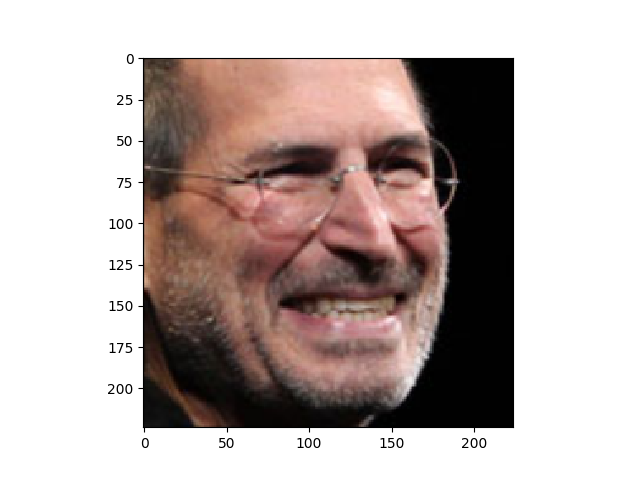

In [3]:
line = lines[0].split(" ")
url = line[1]
left = math.floor(float(line[2]))
top = math.floor(float(line[3]))
right = math.ceil(float(line[4]))
bottom = math.ceil(float(line[5]))

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

face_crop = img[top:bottom, left:right]
face_crop_resized = resize(face_crop, (224, 224), mode="constant", anti_aliasing=True, preserve_range=True)

plt.imshow(face_crop_resized / 255.0)

Set up model in both TensorFlow as well as pure Python, restore trained weights.

In [4]:
weights_file = "/home/explicat/.keras/models/vggface/rcmalli_vggface_tf_vgg16.h5"

sess = tf.InteractiveSession()
tf_cnn = TfVGGFace(sess)
tf_cnn.load(sess, weights_file)

my_cnn = MyVGGFace()
my_cnn.restore_weights(weights_file)

Run infernece with TensorFlow model

In [5]:
tf_predictions = tf_cnn.inference(face_crop_resized[None, :])
print(decode_predictions(tf_predictions))

[[["b'Steve_Jobs'", 0.9974125], ["b'Guillaume_Canet'", 0.00019308347], ["b'John_Schneider'", 0.00018820752], ["b'Warren_Brown'", 0.00011421438], ["b'Mark_Deklin'", 8.970913e-05]]]


Run inference with pure Python model

In [7]:
my_predictions = my_cnn.inference(face_crop_resized[None, :])
print(decode_predictions(my_predictions))

Feeding through layer conv1_1
Feeding through layer conv1_2
Feeding through layer pool1
Feeding through layer conv2_1
Feeding through layer conv2_2
Feeding through layer pool2
Feeding through layer conv3_1
Feeding through layer conv3_2
Feeding through layer conv3_3
Feeding through layer pool3
Feeding through layer conv4_1
Feeding through layer conv4_2
Feeding through layer conv4_3
Feeding through layer pool4
Feeding through layer conv5_1
Feeding through layer conv5_2
Feeding through layer conv5_3
Feeding through layer pool5
Feeding through layer fc6
Feeding through layer fc7
Feeding through layer fc8
[[["b'Steve_Jobs'", 0.99741250731262854], ["b'Guillaume_Canet'", 0.00019308144863700022], ["b'John_Schneider'", 0.00018820567428449626], ["b'Warren_Brown'", 0.00011421375650570418], ["b'Mark_Deklin'", 8.9708620012594328e-05]]]
